In [ ]:

# !pip install jupyternotify ipywidgets
# !pip install mitosheet
%conda install mitosheet -y

In [ ]:
%conda install -c anaconda pivottablejs

# good practice

## dict instead of if else

In [1]:
def func1(x):
    return x * 2


def func2(x):
    return x**2


def func3(x):
    return x / 3

In [2]:
number = int(input())
if number == 1:
    print(func1(number))
elif number == 2:
    print(func2(number))
else:
    print(func3(number))

10
3.3333333333333335


In [88]:
number = int(input())

func_map = {1: func1, 2: func2}
print(func_map.get(number, func3)(number))

3.3333333333333335


# grouping and pivot tables

In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.dropna(inplace=True)

In [ ]:
from pivottablejs import pivot_ui

pivot_ui(df)

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# good density plot


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

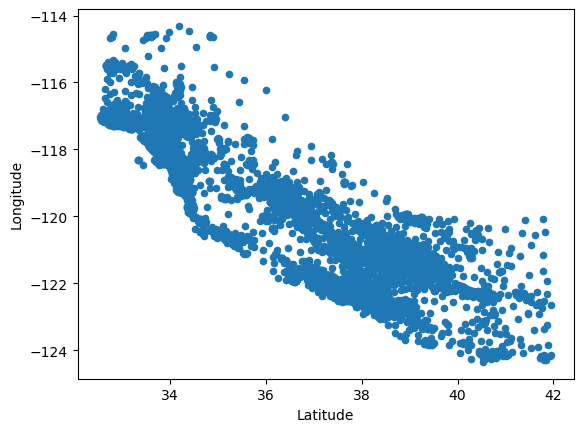

In [23]:
df.plot(kind='scatter',x="Latitude",y="Longitude")

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

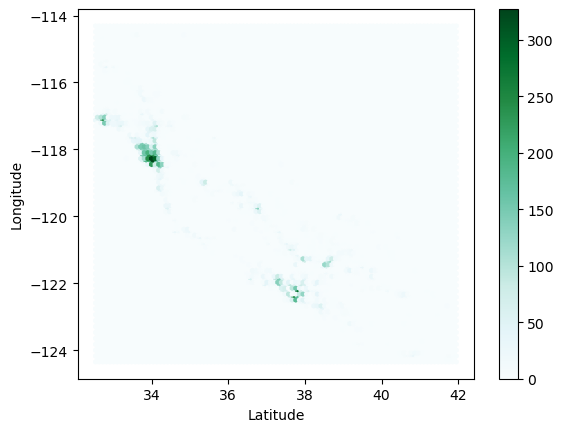

In [24]:
df.plot(kind='hexbin',x="Latitude",y="Longitude")

# clear output


In [7]:
from IPython.display import clear_output
import time
for i in range(20):
    clear_output(wait=True)
    print(i)
    time.sleep(0.1)
    

19


# Auto formating the pep8

In [68]:
import jupyter_black

jupyter_black.load()



<IPython.core.display.Javascript object>

# works only on navigator and notify when a cell finish running 

In [72]:
%load_ext jupyternotify
import time

%%notify -m "sleep for 5 secs"

time.sleep(5)

<IPython.core.display.Javascript object>

# The best data analysis library (like excel) and generates code for each task
## only jupyterLab

In [ ]:
import mitosheet
mitosheet.sheet()

# A great libraries to explore data 

In [ ]:
import dtale

d = dtale.show(df)
d.open_browser()

In [ ]:
# pandasgui

# we need to set pandas and numpy options for a good visual representation

In [99]:
import pandas as pd
pd.set_option("display.max_columns", None)

# List of categoric and numeric features



AttributeError: 'Series' object has no attribute 'progress_apply'

In [36]:
count=10_000
print(f"{count = }")

count = 10000


### for fast testing models fitting

In [39]:
import seaborn as sns

sns.lmplot(data=df,x="Latitude",y="Longitude",order=1)

Object `sns.lmplot(data=df,x="Latitude",y="Longitude",order=1)` not found.


### It would be great if we specify for pandas the categorical and numerical features

In [ ]:
cat = [    "Well_Name",]

num = [    "Well_Stage",]
df.astype({k: "category" for k in cat})

# tqdm

In [100]:
from tqdm.notebook import tqdm
tqdm.pandas()
for i in tqdm(range(100)):
    time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [101]:
df["Longitude"].progress_apply(lambda elem: elem**2)

  0%|          | 0/20640 [00:00<?, ?it/s]

0        14940.1729
1        14937.7284
2        14942.6176
3        14945.0625
4        14945.0625
            ...    
20635    14662.7881
20636    14691.8641
20637    14694.2884
20638    14718.5424
20639    14699.1376
Name: Longitude, Length: 20640, dtype: float64

In [42]:
from tqdm import tqdm
for i in tqdm(range(10000)):
    pass

100%|██████████| 10000/10000 [00:00<00:00, 1571253.47it/s]


In [44]:
from tqdm import tqdm
with tqdm(total=100) as pbar:
    for i in range(100):
        time.sleep(0.1)
        pbar.update(1)

100%|██████████| 100/100 [00:10<00:00,  9.84it/s]


# pandas paralyzer

In [ ]:
!conda install -c conda-forge swifter -y

In [78]:
%timeit df["Longitude"]**2

67.9 µs ± 831 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [79]:
%timeit df["Longitude"].apply(lambda elem: elem**2)

4.95 ms ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [81]:
import swifter
%timeit df["Longitude"].swifter.apply(lambda elem: elem**2)

761 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### job lib

In [ ]:
!conda install -c anaconda joblib -y

In [83]:
def parallelized_fun(x):
    return x**2

In [93]:
from joblib import Parallel, delayed
import numpy as np


In [ ]:
%%timeit 
Parallel(n_jobs=-1, prefer="processes", verbose=6)(delayed(parallelized_fun)(elem) for elem in np.array_split(df["Longitude"],100))

# The following is a magnificent tool to run interactive cells (changing values of inputs for instance)

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that returns its only argument `x`.

In [2]:
def f(x):
    return x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [3]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and its return value is printed.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [4]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a string, `interact` will generate a text box.

In [5]:
interact(f, x="Hi there!");

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [6]:
@interact(x=10, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), FloatSlider(value=1.0, descriptio…

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [7]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [8]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

Notice that a slider is only produced for `p` as the value of `q` is fixed.

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10,+3*10]`. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10, max=30, step=1, value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [9]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

The following table gives an overview of different argument types, and how they map to interactive controls:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

You have seen how the checkbox and text widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min, max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [10]:
interact(f, x=(0, 4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

If a 3-tuple of integers is passed `(min,max,step)`, the step size can also be set.

In [11]:
interact(f, x=(0, 8, 2));

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

A float-valued slider is produced if *any* of the elements of the tuples are floats. Here the minimum is `0.0`, the maximum is `10.0` and step size is `0.1` (the default).

In [12]:
interact(f, x=(0.0, 10.0));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

The step size can be changed by passing a third element in the tuple.

In [13]:
interact(f, x=(0.0, 10.0, 0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`.

In [14]:
@interact(x=(0.0, 20.0, 0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

Dropdown menus are constructed by passing a list of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [15]:
interact(f, x=["apples", "oranges"]);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of `('label', value)` pairs. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [16]:
interact(f, x=[("one", 10), ("two", 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

Finally, if you need more granular control than that afforded by the abbreviation, you can pass a `ValueWidget` instance as the argument. A `ValueWidget` is a widget that aims to control a single value. Most of the widgets [bundled with ipywidgets](Widget%20List.ipynb) inherit from `ValueWidget`. For more information, see [this section](Widget%20Custom.ipynb#DOMWidget,-ValueWidget-and-Widget) on widget types.

In [17]:
interact(
    f,
    x=widgets.Combobox(options=["Chicago", "New York", "Washington"], value="Chicago"),
);

interactive(children=(Combobox(value='Chicago', description='x', options=('Chicago', 'New York', 'Washington')…

## `interactive`

In addition to `interact`, IPython provides another function, `interactive`, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Note that unlike `interact`, the return value of the function will not be displayed automatically, but you can display a value inside the function with `IPython.display.display`.

Here is a function that displays the sum of its two arguments and returns the sum. The `display` line may be omitted if you don't want to show the result of the function.

In [18]:
from IPython.display import display


def f(a, b):
    display(a + b)
    return a + b

Unlike `interact`, `interactive` returns a `Widget` instance rather than immediately displaying the widget.

In [19]:
w = interactive(f, a=10, b=20)

The widget is an `interactive`, a subclass of `VBox`, which is a container for other widgets.

In [20]:
type(w)

ipywidgets.widgets.interaction.interactive

The children of the `interactive` are two integer-valued sliders and an output widget, produced by the widget abbreviations above.

In [21]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '30'}, 'metadata': {}},)))

To actually display the widgets, you can use IPython's `display` function.

In [22]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

At this point, the UI controls work just like they would if `interact` had been used. You can manipulate them interactively and the function will be called. However, the widget instance returned by `interactive` also gives you access to the current keyword arguments and return value of the underlying Python function. 

Here are the current keyword arguments. If you rerun this cell after manipulating the sliders, the values will have changed.

In [23]:
w.kwargs

{'a': 10, 'b': 20}

Here is the current return value of the function.

In [24]:
w.result

30

## Disabling continuous updates

When interacting with long running functions, realtime feedback is a burden instead of being helpful.  See the following example:

In [25]:
def slow_function(i):
    print(
        int(i),
        list(
            x
            for x in range(int(i))
            if str(x) == str(x)[::-1] and str(x**2) == str(x**2)[::-1]
        ),
    )
    return

In [26]:
%%time
slow_function(1e6)

1000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
CPU times: user 430 ms, sys: 0 ns, total: 430 ms
Wall time: 429 ms


Notice that the output is updated even while dragging the mouse on the slider. This is not useful for long running functions due to lagging:

In [27]:
from ipywidgets import FloatSlider

interact(slow_function, i=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

There are two ways to mitigate this.  You can either only execute on demand, or restrict execution to mouse release events.

### `interact_manual`

The `interact_manual` function provides a variant of interaction that allows you to restrict execution so it is only done on demand.  A button is added to the interact controls that allows you to trigger an execute event.

In [28]:
interact_manual(slow_function, i=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

You can do the same thing with `interactive` by using a `dict` as the second argument, as shown below.

In [29]:
slow = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
slow

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

### `continuous_update`

If you are using slider widgets, you can set the `continuous_update` kwarg to `False`.  `continuous_update` is a kwarg of slider widgets that restricts executions to mouse release events.

In [30]:
interact(
    slow_function, i=FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False)
);

interactive(children=(FloatSlider(value=100000.0, continuous_update=False, description='i', max=10000000.0, mi…

## More control over the user interface: `interactive_output`

`interactive_output` provides additional flexibility: you can control how the UI elements are laid out.

Unlike `interact`, `interactive`, and `interact_manual`, `interactive_output` does not generate a user interface for the widgets. This is powerful, because it means you can create a widget, put it in a box, and then pass the widget to `interactive_output`, and have control over the widget and its layout.

In [31]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])


def f(a, b, c):
    print((a, b, c))


out = widgets.interactive_output(f, {"a": a, "b": b, "c": c})

display(ui, out)

Output()

## Arguments that are dependent on each other

Arguments that are dependent on each other can be expressed manually using `observe`.  See the following example, where one variable is used to describe the bounds of another.  For more information, please see the [widget events example notebook](./Widget%20Events.ipynb).

In [32]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)


def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value


y_widget.observe(update_x_range, "value")


def printer(x, y):
    print(x, y)


interact(printer, x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

## Flickering and jumping output

On occasion, you may notice interact output flickering and jumping, causing the notebook scroll position to change as the output is updated. The interactive control has a layout, so we can set its height to an appropriate value (currently chosen manually) so that it will not change size as it is updated.


In [33]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np


def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()


interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = "350px"
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Interact with multiple functions

You may want to have a single widget interact with multiple functions. This is possible by simply linking the widget to both functions using the interactive_output() function. The order of execution of the functions will be the order they were linked to the widget.


In [34]:
import ipywidgets as widgets
from IPython.display import display

a = widgets.IntSlider(value=5, min=0, max=10)


def f1(a):
    display(a)


def f2(a):
    display(a * 2)


out1 = widgets.interactive_output(f1, {"a": a})
out2 = widgets.interactive_output(f2, {"a": a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

# graphs


In [35]:

%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
import networkx as nx

In [37]:
# wrap a few graph generation functions so they have the same signature


def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)


def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)


def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)


def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)


def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [38]:
interact(
    plot_random_graph,
    n=(2, 30),
    m=(1, 10),
    k=(1, 10),
    p=(0.0, 0.99, 0.001),
    generator=[
        ("lobster", random_lobster),
        ("power law", powerlaw_cluster),
        ("Newman-Watts-Strogatz", newman_watts_strogatz),
        ("Erdős-Rényi", erdos_renyi),
    ],
);

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

# Image

In [39]:
from sklearn import datasets

In [40]:
digits = datasets.load_digits()


def browse_images(digits):
    n = len(digits.images)

    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
        plt.title("Training: %s" % digits.target[i])
        plt.show()

    interact(view_image, i=(0, n - 1))

In [41]:
browse_images(digits)

interactive(children=(IntSlider(value=898, description='i', max=1796), Output()), _dom_classes=('widget-intera…

In [42]:
# Stdlib imports
from io import BytesIO

# Third-party libraries
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import numpy as np

ModuleNotFoundError: No module named 'skimage'

Let's load an image from scikit-image's collection, stored in the data module. These come back as regular numpy arrays:

Let's make a little utility function for displaying Numpy arrays with the IPython display protocol:

In [43]:
i = img_as_float(data.coffee())
i.shape


def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = "png", mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = "jpg", None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == "uint8" else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

NameError: name 'img_as_float' is not defined

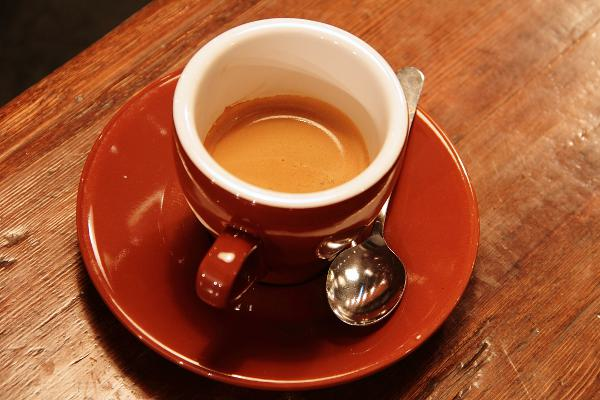

In [61]:
arr2img(i)

Now, let's create a simple "image editor" function, that allows us to blur the image or change its color balance:

In [62]:
def edit_image(image, sigma=0.1, R=1.0, G=1.0, B=1.0):
    new_image = filters.gaussian(image, sigma=sigma, channel_axis=-1)
    new_image[:, :, 0] = R * new_image[:, :, 0]
    new_image[:, :, 1] = G * new_image[:, :, 1]
    new_image[:, :, 2] = B * new_image[:, :, 2]
    return arr2img(new_image)

We can call this function manually and get a new image. For example, let's do a little blurring and remove all the red from the image:

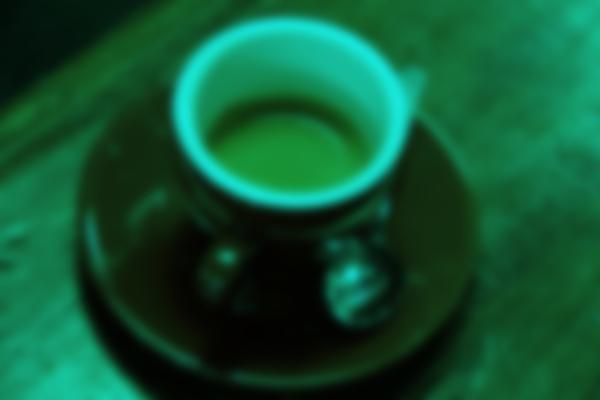

In [63]:
edit_image(i, sigma=5, R=0.1)


But it's a lot easier to explore what this function does by controlling each parameter interactively and getting immediate visual feedback. IPython's ipywidgets package lets us do that with a minimal amount of code:

In [64]:
lims = (0.0, 1.0, 0.01)
interact(edit_image, image=fixed(i), sigma=(0.0, 10.0, 0.1), R=lims, G=lims, B=lims);

interactive(children=(FloatSlider(value=0.1, description='sigma', max=10.0), FloatSlider(value=1.0, descriptio…

### Browsing the scikit-image gallery, and editing grayscale and jpg images

The coffee cup isn't the only image that ships with scikit-image, the data module has others. Let's make a quick interactive explorer for this:

In [65]:
def choose_img(name):
    # Let's store the result in the global `img` that we can then use in our image editor below
    global img
    img = getattr(data, name)()
    return arr2img(img)


# Skip 'load' and 'lena', two functions that don't actually return images
interact(choose_img, name=sorted(set(data.__all__) - {"lena", "load"}));

interactive(children=(Dropdown(description='name', options=('astronaut', 'binary_blobs', 'brain', 'brick', 'ca…

And now, let's update our editor to cope correctly with grayscale and color images, since some images in the scikit-image collection are grayscale. For these, we ignore the red (R) and blue (B) channels, and treat 'G' as 'Grayscale':

In [66]:
lims = (0.0, 1.0, 0.01)


def edit_image(image, sigma, R, G, B):
    new_image = filters.gaussian(image, sigma=sigma, channel_axis=-1)
    if new_image.ndim == 3:
        new_image[:, :, 0] = R * new_image[:, :, 0]
        new_image[:, :, 1] = G * new_image[:, :, 1]
        new_image[:, :, 2] = B * new_image[:, :, 2]
    else:
        new_image = G * new_image
    return arr2img(new_image)


interact(edit_image, image=fixed(img), sigma=(0.0, 10.0, 0.1), R=lims, G=lims, B=lims);

interactive(children=(FloatSlider(value=5.0, description='sigma', max=10.0), FloatSlider(value=0.5, descriptio…

# adding env to jupyter


python -m ipykernel install --user --name=firstEnv

python -m ipykernel install --user --name=firstEnv


# CPU AND GPU usage

htop

<!-- graphical -->
gnome-system-monitor 